<a href="https://colab.research.google.com/github/GarvinAgweli/personal/blob/main/CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
#STEP_1:DATA LOADING
# import all the required libraries and dependencies for dataframe

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all the required libraries and dependencies for machine learning

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
import statsmodels.api as sm
import pickle
import gc
from sklearn import svm
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [ ]:
df=pd.read_csv('creditcard.csv.zip')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#STEP_2: DATA CLEANSING
df.dtypes

,0
Time,float64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


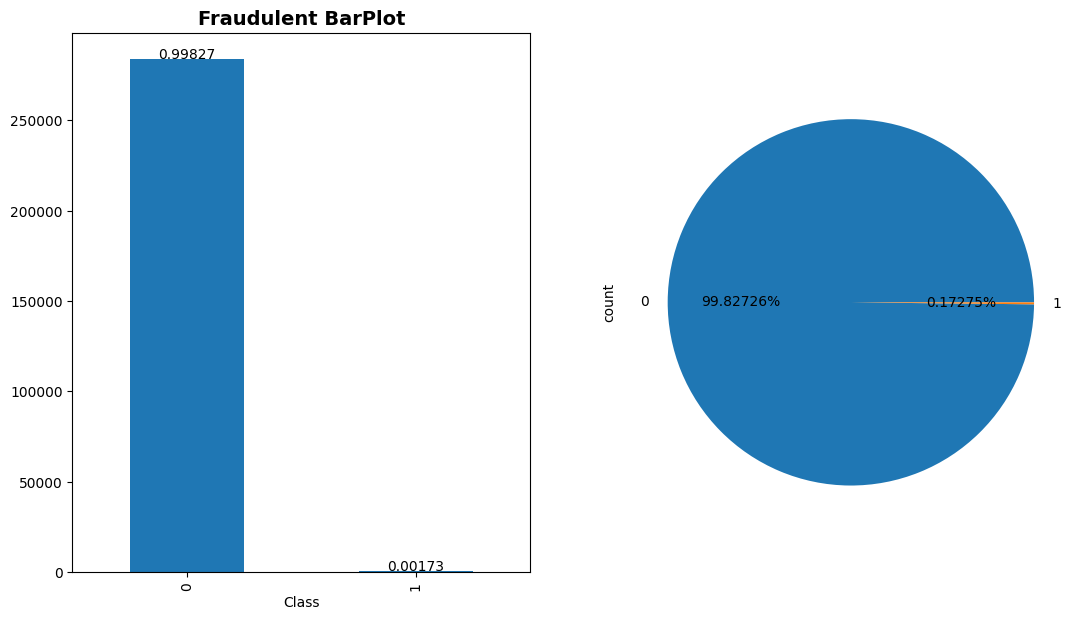

In [ ]:
#STEP_3: DATA VISUALISATION
plt.figure(figsize=(13,7))
plt.subplot(121)
plt.title('Fraudulent BarPlot', fontweight='bold',fontsize=14)
ax = df['Class'].value_counts().plot(kind='bar')
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.5f}'.format(height/total),
            ha="center")


plt.subplot(122)
df["Class"].value_counts().plot.pie(autopct = "%1.5f%%")
plt.show()

In [ ]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


[None, None]

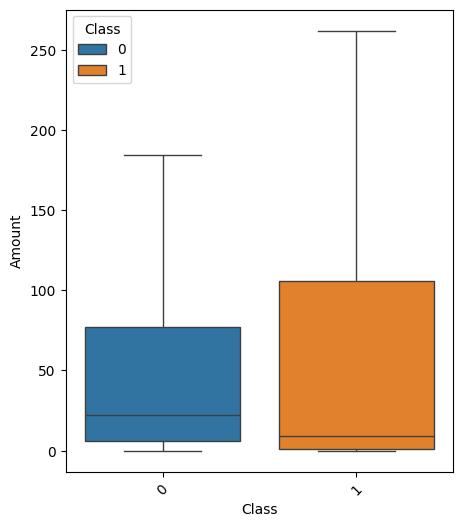

In [ ]:
# Box Plot of amount for both classes
plt.figure(figsize = (5, 6))
a=sns.boxplot(x = 'Class', y = 'Amount',hue='Class', data = df,showfliers=False)
plt.setp(a.get_xticklabels(), rotation=45)

Text(0, 0.5, 'Density')

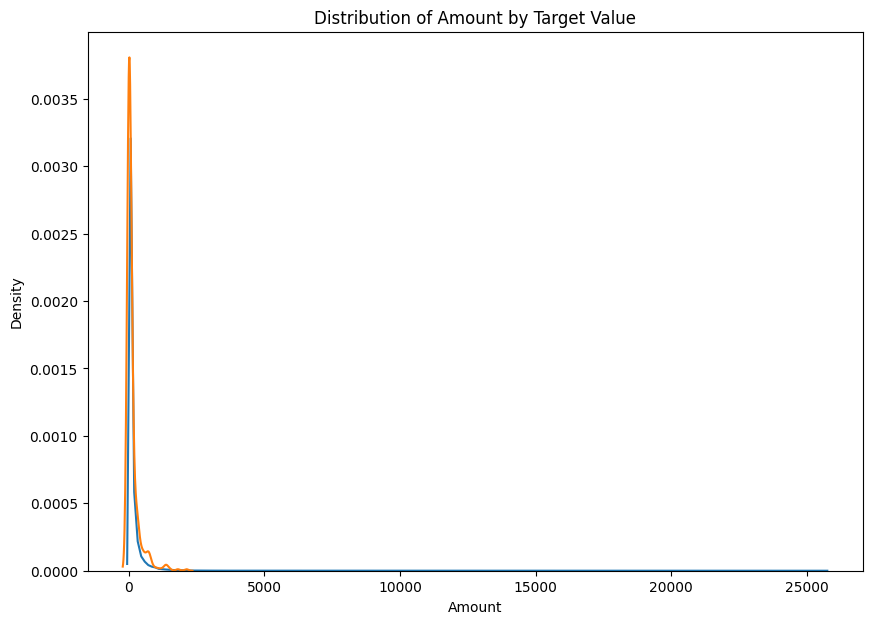

In [ ]:
# KDE plot to visualize the distribution of Amount for both the classes
plt.rcParams['figure.figsize'] = [10,7]
sns.kdeplot(df.loc[df['Class'] == 0, 'Amount'], label = 'Non Fraud')
sns.kdeplot(df.loc[df['Class'] == 1, 'Amount'], label = 'Fraud')
plt.title('Distribution of Amount by Target Value')
plt.xlabel('Amount')
plt.ylabel('Density')

<Axes: title={'center': 'Distribution of Transaction Time'}, ylabel='Density'>

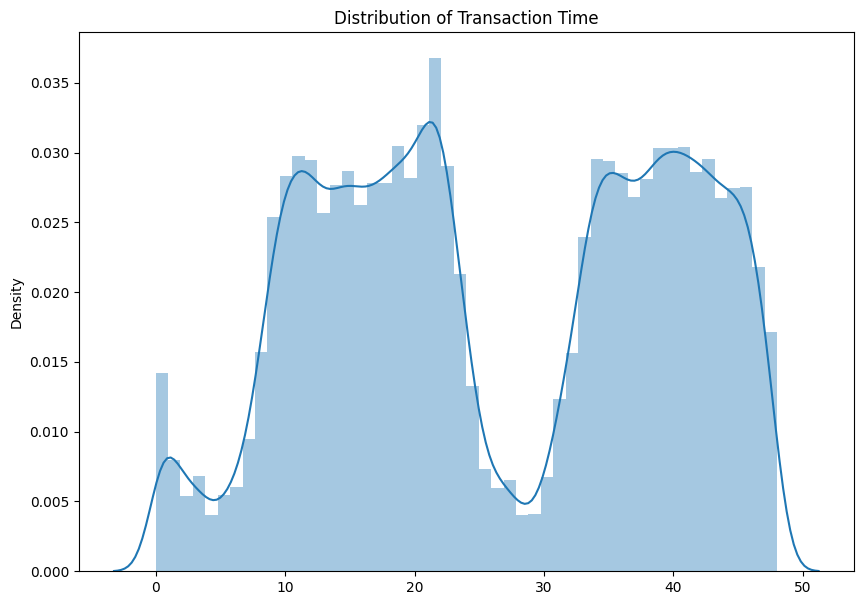

In [ ]:
# Time Distribution plot for transactions
plt.figure(figsize=(10,7))

plt.title('Distribution of Transaction Time')
sns.distplot(df['Time'].values/(60*60))

In [ ]:
#Storing Fraud and Non-fraud tansactions
df_fraud=df[df.Class==0]
df_non_fraud=df[df.Class==1]

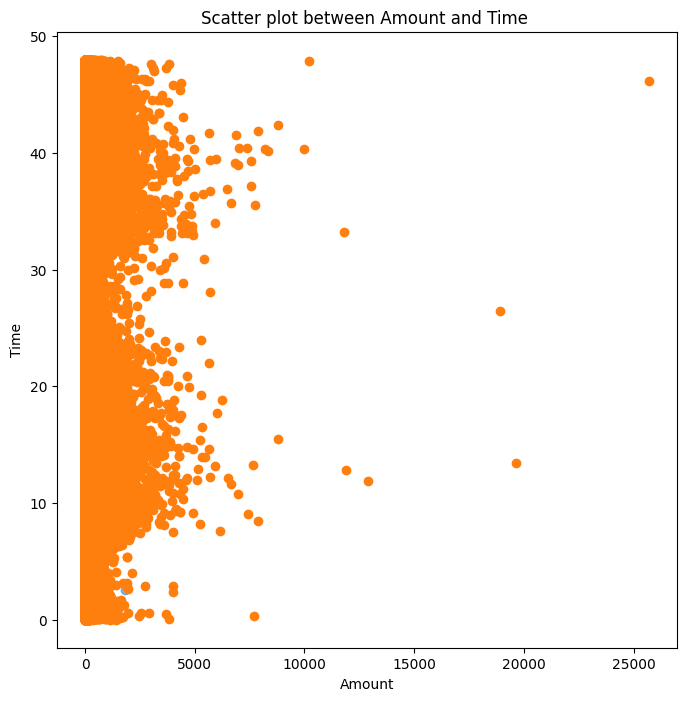

In [ ]:
#Scatter plot between Time and Amount

fig = plt.figure(figsize = (8,8))
plt.scatter(df_non_fraud.Amount, df_non_fraud.Time.values/(60*60),alpha=0.5,label='Non_Fraud')
plt.scatter(df_fraud.Amount, df_fraud.Time.values/(60*60),alpha=1,label='Fraud')
plt.xlabel('Amount')
plt.ylabel('Time')
plt.title('Scatter plot between Amount and Time ')
plt.show()

In [ ]:
X=df.drop("Class",axis=1)
y=df["Class"]
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [ ]:
#STEP 4:SPLITING AND TRAINING OF DATA
#Spliting into training and test set
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
#Handle imbalance using SMOTE(on training set only)
from imblearn.over_sampling import SMOTE
Smote=SMOTE(random_state=42)
X_train_resampled,y_train_resampled= Smote.fit_resample(X_train,y_train)

In [ ]:
#STEP 5: BULDING A LOGISTIC MODEL
#Train Logistic Regression Model + SMOTE
logreg=LogisticRegression(max_iter=1000,random_state=42)
logreg.fit(X_train_resampled,y_train_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
#Make prediction on test data
y_pred=logreg.predict(X_test_scaled)
y_pred_proba=logreg.predict_proba(X_test_scaled)[:,1]

In [ ]:
# Evaluation Metrics
print('Classification report:\n', classification_report(y_test, y_pred))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_pred))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_pred))
print('ROC AUC : ', roc_auc_score(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Confusion matrix:
 [[55397  1467]
 [    8    90]]
Logistic Regression Accuracy:  0.9741055440469084
ROC AUC :  0.9462844753827248


In [ ]:
#Train Random Forest Classifier + SMOTE
rf=RandomForestClassifier(n_estimators=100,max_depth=None,class_weight=None,random_state=42,n_jobs=-1)
rf.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
#Make prediction on test data
rf.fit(X_train_resampled,y_train_resampled)
y_predicted = rf.predict(X_test)


In [57]:
#Evaluation of metrics
print("Classification report:\n", classification_report(y_test, y_pred,digits=4))
print("Confusion matrix:\n",confusion_matrix(y_true = y_test, y_pred = y_pred))
print(f"ROC AUC Score:{roc_auc_score(y_test, y_pred):0.4f}")

Classification report:
               precision    recall  f1-score   support

           0     0.9997    0.9968    0.9982     56864
           1     0.3094    0.8367    0.4518        98

    accuracy                         0.9965     56962
   macro avg     0.6546    0.9168    0.7250     56962
weighted avg     0.9985    0.9965    0.9973     56962

Confusion matrix:
 [[56681   183]
 [   16    82]]
ROC AUC Score:0.9168


In [51]:
#Training XGBoost Model + SMOTE $ pipeline
xgb=XGBClassifier(use_label_encoder=False,
                  eval_metric='logloss',n_estimators=100,learning_rate=0.1,
                  max_depth=6,subsample=0.8,colsample_bytree=0.8,
                  random_state=42)
xgb.fit(X_train_resampled,y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [52]:
#Prediction
y_pred=xgb.predict(X_test)
y_pred_proba=xgb.predict_proba(X_test)[:,1]

In [55]:
#Evaluation
print("\nClassification Report:")
print(classification_report(y_test,y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print(f"ROC AUC Score::{roc_auc_score(y_test,y_pred_proba):0.4f}")
print(roc_auc_score(y_test,y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.31      0.84      0.45        98

    accuracy                           1.00     56962
   macro avg       0.65      0.92      0.73     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
[[56681   183]
 [   16    82]]
ROC AUC Score::0.9761
0.9167582445189668


In [69]:
#STEP 6 : HYPERTUNING XGB Model ON SMOTE
#Defining hyperparameters grid
param_grid={
        'min_child_weight': [1, 5, 10,15],
        'gamma': [0.5, 1, 1.5, 2, 5,8],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0,1.2],
        'max_depth': [3, 4, 5,6,7]
        }

In [58]:
#Cross-validation strategy
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [70]:
#Grid search with AUC as scoring metrics
grid_search=GridSearchCV(estimator=pipeline,param_grid=param_grid,scoring=roc_auc_score,
  cv=skf,n_jobs=-1,verbose=2)

In [78]:
model_xgb_tuned_smote = XGBClassifier(min_child_weight= 10,
        gamma= 1.5,
        subsample= 0.6,
        colsample_bytree= 0.6,
        max_depth= 5)

In [80]:
#Fit the model on train data
model_xgb_tuned_smote.fit(X_train_resampled,y_train_resampled)
y_predicted =model_xgb_tuned_smote.predict(X_test)

In [81]:
#Evaluation metrics
print("Classification report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n",confusion_matrix(y_true = y_test, y_pred = y_pred))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_pred))
print('ROC AUC : ', roc_auc_score(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.31      0.84      0.45        98

    accuracy                           1.00     56962
   macro avg       0.65      0.92      0.73     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
 [[56681   183]
 [   16    82]]
Logistic Regression Accuracy:  0.9965064428917524
ROC AUC :  0.9167582445189668


In [83]:
#STEP 7 : BEST MODEL SELECTION
#metrics                why it matters
#ROC AUC             - Measures true vs +ve separation
#F1 SCore            - Balance precision & recall on fraud class
#Recall             -  How many actual frauds were caught
#Precision          -  How many predicted frauds were correct
#Confusion Matrix   -  Helps spot bias toward majority class

In [85]:
#Train the models with SMOTE + StratifiedKFold for fairness
models={
    "Logistic Regression":LogisticRegression(max_iter=1000,random_state=42),
    "Random Forest":RandomForestClassifier(n_estimators=100,random_state=42),
    "XGBoost":XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=42)
}

In [89]:
#Comparison of the Models
for name,model in models.items():
  model.fit(X_train_resampled,y_train_resampled)
  y_pred=model.predict(X_test_scaled)
  y_pred_proba=model.predict_proba(X_test_scaled)[:,1]

  print(f"\n{name}")
  print(classification_report(y_test,y_pred,digits=4))
  print(confusion_matrix(y_true=y_test,y_pred=y_pred))
  print(f"ROC AUC Score::{roc_auc_score(y_test,y_pred_proba):0.4f}")


Logistic Regression
              precision    recall  f1-score   support

           0     0.9999    0.9742    0.9869     56864
           1     0.0578    0.9184    0.1088        98

    accuracy                         0.9741     56962
   macro avg     0.5288    0.9463    0.5478     56962
weighted avg     0.9982    0.9741    0.9854     56962

[[55397  1467]
 [    8    90]]
ROC AUC Score::0.9708

Random Forest
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9997     56864
           1     0.8710    0.8265    0.8482        98

    accuracy                         0.9995     56962
   macro avg     0.9353    0.9132    0.9240     56962
weighted avg     0.9995    0.9995    0.9995     56962

[[56852    12]
 [   17    81]]
ROC AUC Score::0.9684

XGBoost
              precision    recall  f1-score   support

           0     0.9997    0.9995    0.9996     56864
           1     0.7281    0.8469    0.7830        98

    accuracy                   

In [92]:
#what is the best model?
best_model=None
best_auc=0

for name,model in models.items():
  model.fit(X_train_resampled,y_train_resampled)
  y_pred_proba=model.predict_proba(X_test_scaled)[:,1]
  auc=roc_auc_score(y_test,y_pred)

  if auc>best_auc:
    best_auc=auc
    best_model=(name, model)
print(f"\nBest Model: {best_model[0]} with AUC: {best_auc:.4f}")


Best Model: Logistic Regression with AUC: 0.9232


In [99]:
#Best model criteria
#if missing frauds is critical-priotize high recall
#If false alarms are costly -priotize high precision
#For overall ranking - use ROC AUC

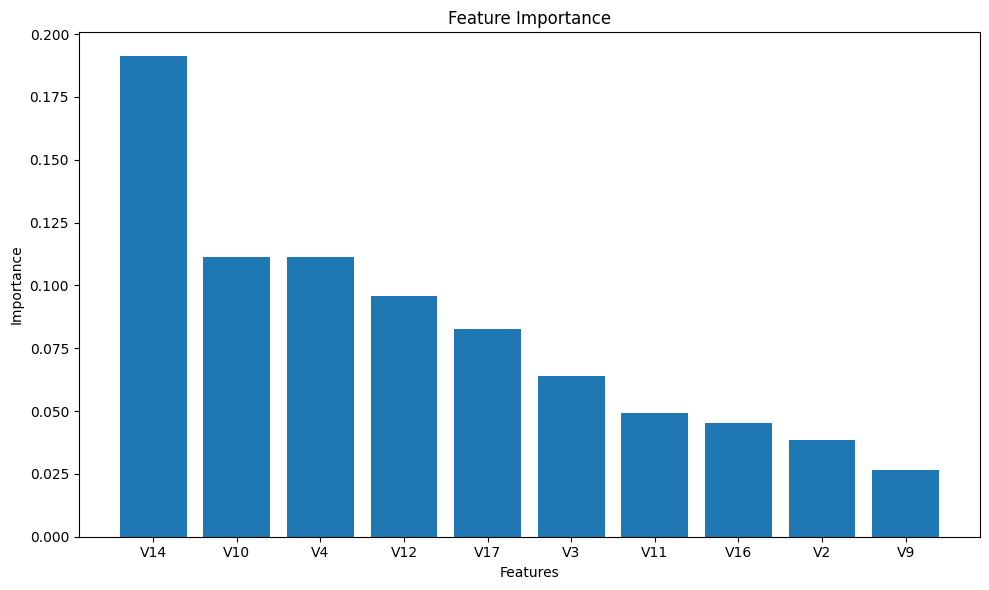

In [91]:
#STEP 8: FEATURE IMPORTANCE BY MODELS
#Random Forest Feature

importances=rf.feature_importances_
feature_names=X.columns
indices=np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(10),importances[indices[:10]],align="center")
plt.xticks(range(10),feature_names[indices[:10]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

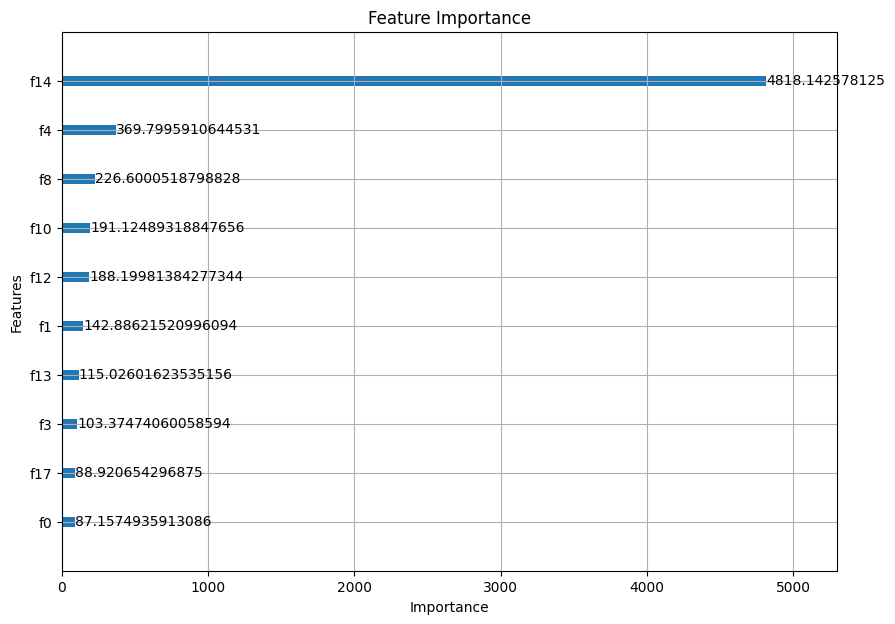

In [94]:
#XGBoost Feature importance
from xgboost import plot_importance


xgb_model=xgb.XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=42)
xgb_model.fit(X_train_resampled,y_train_resampled)

plt.figure(figsize=(10,6))
plot_importance(xgb_model,max_num_features=10,importance_type='gain')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.show()

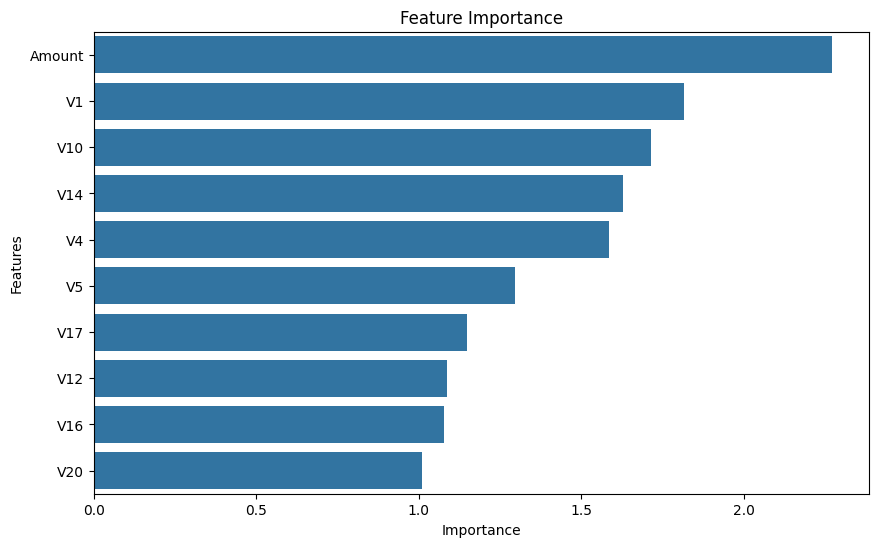

In [97]:
coeffs= pd.Series(logreg.coef_[0],index=X.columns)
top_coeffs= coeffs.abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_coeffs.values,y=top_coeffs.index)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [98]:
#I have build a logistic regression model based on the transaction data provided.The data provided was a very imbalanced data set.
#Hence, for building a proper logistic model on top of that I have used a balancing techniques,SMOTE,
#to balance the data and applied some of very popular logistic regression models like Random Forest, Logistic regression .......
#and some boosting techniques like XGBoost to catch any fraud transactions.
#In this scenario Accuracy was not a concerning Evaluation criteria and I focussed more on Recall and AUC.
#I was finally able to build a proper logistic model and predicted on test data and the results were satisfying.
#I were also able to figure out the variables which will be important in detecting any fraud transactions.